<a href="https://colab.research.google.com/github/rosesardina/ECE61000-EnergyConversion/blob/ThreePhaseLoad/Three_phase_load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook created by:<br>
Dionysios Aliprantis  |  Professor of
Electrical and Computer Engineering, Purdue University<br>
465 Northwestern Ave., West Lafayette, Indiana 47907-2035<br>
765.494.4434  |  dionysis@purdue.edu<br>
https://engineering.purdue.edu/~dionysis/<br>

Revision: August 31, 2021

Note: This notebook is intended for use by students of ECE 61000 Energy Conversion at Purdue University. The material is subject to change without notice. Unless otherwise noted, figures are obtained from the course textbook: P. Krause, O. Wasynczuk, S. Sudhoff, and S. Pekarek, *Analysis of Electric Machinery and Drive Systems*, Third edition, 2013, Wiley-IEEE Press.

---

# Simulation of 3-phase *RL* circuit

*Objectives:*

* Get familiar with opening and running Jupyter notebooks.
* Learn basic Python syntax.
* Recall ac electric circuit concepts.
* Express equations of three-phase circuits concisely using vectors and matrices.
* Learn how to conduct a computer simulation of the transient response of balanced and unbalanced 3-phase electrical circuits using Python.

*Prerequisites:*

* General interest in power systems engineering ;)
* Basic electrical circuit analysis.
* Elementary programming skills.
* Go over the introduction to Google Colab: https://colab.research.google.com/notebooks/welcome.ipynb
* Watch the lecture videos of the Introduction section.  

<br>


---




## Symmetric load connected to symmetric source

Our first major task will be to solve a symmetric three-phase circuit.


The load is Y-connected and has the following parameters:
* resistance $r_s = 0.1~\Omega$
* self inductance $L_s = 3$ mH
* mutual inductance $M = -1$ mH

![3-phase symmetric load](https://drive.google.com/uc?id=1Wrq7IosVupICwesKcjLAnsQVA-JAc3aB)

**Question:** Can you think of a reason why the mutual inductance is negative? Try to sketch a configuration of coils in space that leads to this kind of mutual coupling. [*Hint: Consider the coils as shown on the circuit diagram, and sketch their flux lines.*]

<br>

The voltage and flux linkage equations of the load are:
\begin{align}
\mathbf{v}_{abcs} &= r_s \mathbf{i}_{abcs} + p\mathbf{\lambda}_{abcs} \\
\mathbf{\lambda}_{abcs} &= \mathbf{L}_s \mathbf{i}_{abcs}
\end{align}
where the inductance matrix is
$$  
\mathbf{L}_s =
\begin{bmatrix}
L_s & M & M \\
M & L_s & M \\
M & M & L_s
\end{bmatrix} \,.
$$

<br>

The circuit is connected to a three-phase, Y-connected, balanced source with:
* rms value $E = 120$ V
* frequency $f = 60$ Hz
* phase $\theta_{e0} = -\frac{\pi}{2}$ rad

so that the $abc$ source voltages are
\begin{align*}
e_{a}(t) &= \sqrt{2} E \cos(2\pi f t + \theta_{e0}) \\
e_b(t) &= \sqrt{2} E \cos(2\pi f t + \theta_{e0} - 2\pi/3)\\
e_c(t) &= \sqrt{2} E \cos(2\pi f t + \theta_{e0} + 2\pi/3) \,.
\end{align*}

The source is connected directly across the load at $t=0$.
Due to source and load symmetry, we have learned that this implies:
$$
\mathbf{v}_{abcs} = \mathbf{e}_{abc} \,.
$$
This is because the neutral points of both source and load are at the same potential.
For this problem, which exhibits perfect symmetry, the presence of the neutral conductor is thus irrelevant, and the results hold for both cases, i.e., both for a 3-wire and 4-wire system.
<br>

The problem is to determine the current waveforms as a function of time during the energization of the circuit.

### Importing Python libraries

In Python, we must first import a set of libraries that we need. For example, here we are importing NumPy (for manipulating arrays and doing linear algebra, https://numpy.org/) and SciPy.integrate (for integrating ordinary differential equations, https://www.scipy.org/), as well as some basic math functions/symbols. We are also importing matplotlib (for plotting, https://matplotlib.org/) and seaborn (https://seaborn.pydata.org/index.html) for better-looking plots.

In [ ]:
# Import libraries we need to calculate
import numpy as np
import scipy.integrate as spint
from math import pi, sqrt, cos, sin

# Import plotting library and set defaults
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set()
#sns.set_context("talk")
#plt.style.use("dark_background")

### Defining constants

Now we shall define our circuit parameters:

In [ ]:
# define circuit and source parameters -- feel free to change these!
r_s        =  0.1 # resistance (ohm)
L_s        =  3e-3 # self-inductance (henries, H)
M          = -1e-3 # mutual inductance (H)
E          =  120 # rms voltage (V)
f          =  60 # frequency (Hz)
theta_e0   = -pi/2 # voltage phase angle (rad)

# calculate useful constants
E_pk       = sqrt(2)*E # peak voltage
w_e        = 2*pi*f # electrical angular frequency (rad/s)
tau        = (L_s - M)/r_s # time constant of circuit
phi        = np.arctan2(w_e*(L_s-M),r_s) # power factor angle (rad)
Z_s        = r_s + 1j*w_e*(L_s-M) # per-phase impedance (R + jX, ohm)
I_pk       = E_pk/np.abs(Z_s) # steady-state current peak (A)
L          = np.array([[L_s, M, M],[M, L_s, M],[M, M, L_s]]) # inductance matrix
Linv       = np.linalg.inv(L) # inverse of L
P_ss       = 3/2*I_pk*E_pk*cos(phi) # steady state real power (W)
Q_ss       = 3/2*I_pk*E_pk*sin(phi) # steady state reactive power (VAr)
S_ss       = P_ss + 1j*Q_ss # complex power (MW + jMVAr)

print('Circuit parameters:')
print('time constant              tau = {:.2f} ms'.format(tau*1e3))
print('power factor angle         phi = {:.2f} deg'.format(phi/pi*180))
print('power factor                pf = {:.2f} lagging'.format(cos(phi)))
print('impedance                  Z_s = {:.3f} Ohm'.format(Z_s))
print('phase current              I_s = {:.2f} A, rms'.format(I_pk/sqrt(2)))
print('real power                   P = {:.2f} W'.format(P_ss))
print('reactive power               Q = {:.2f} VAr'.format(Q_ss))

Circuit parameters:
time constant              tau = 40.00 ms
power factor angle         phi = 86.21 deg
power factor                pf = 0.07 lagging
impedance                  Z_s = 0.100+1.508j Ohm
phase current              I_s = 79.40 A, rms
real power                   P = 1891.45 W
reactive power               Q = 28522.46 VAr


### Solving the circuit

Let us solve the circuit using the *abc* currents as states. This means that we will ask the computer to solve (numerically) the below differential equation:

$$
\boxed{ p\mathbf{i}_{abcs} = -r_s \mathbf{L}_s^{-1}  \mathbf{i}_{abcs} +
\mathbf{L}_s^{-1} \mathbf{v}_{abcs} ~~\text{with}~~ \mathbf{i}_{abcs}(0) = \mathbf{0} \,.}
$$

Our problem is of the form:
$$
p\mathbf{y} = \mathbf{f}(\mathbf{y}, t) ~~\text{with}~~\mathbf{y}(0) = \mathbf{0} \,.
$$

We will use the solve_ivp function from scipy.integrate to obtain a numerical solution to our initial value problem.
For more information about this, please refer to the online documentation: https://docs.scipy.org/doc/scipy/reference/integrate.html


In [ ]:
# voltage source function definition
two_pi_o_3 = 2*pi/3 # useful constant
def e_abc(t):
  theta_e = w_e*t + theta_e0
  e_a = E_pk*np.cos(theta_e) # using the NumPy cos allows `t' to be an array
  e_b = E_pk*np.cos(theta_e - two_pi_o_3)
  e_c = -e_a - e_b

  if np.isscalar(t): # ODE solver case
    x = np.array([e_a, e_b, e_c]).reshape(3,1)
  else: # plotting case
    x = np.array([e_a, e_b, e_c])
  return x

# derivative function definition
A = -r_s*Linv
def fun(t, y):
  return np.matmul(A,y) + np.matmul(Linv,e_abc(t))

# solve ODE
i_0        = np.zeros(3) # initial condition
N_cycles   = 15
t_span     = (0,N_cycles/f) # time span
N_pts      = 1000
t_eval     = np.linspace(t_span[0],t_span[-1],N_pts)
sol        = spint.solve_ivp(fun, t_span, i_0, method='RK45', t_eval=t_eval,\
                             vectorized=True)
print(sol.message)

t = sol.t
i_as = sol.y[0,:]
i_bs = sol.y[1,:]
i_cs = sol.y[2,:]
pwr = np.sum(np.multiply(e_abc(t),sol.y),axis=0)

The solver successfully reached the end of the integration interval.


Now, let's plot the solution, i.e., the $abc$ current waveforms. We will perform a sanity check by superimposing the steady-state solution. If everything is correct, we should be able to observe exponentially decaying terms superimposed on three steady-state sinusoidal current waveforms.
The exponential terms should  decay almost completely after roughly 5 time constants.

We will also plot the total 3-phase power consumption of the circuit as a function of time:
$$
P(t) = \mathbf{v}_{abcs}^\top(t) \,\mathbf{i}_{abcs}(t) \,.
$$
Interestingly, the power exhibits a very large oscillation at the electrical frequency during the initial transient, which decays with the circuit time constant $\tau$.
In the steady state, the power should reach a constant value.

<br>

###Exercises:

1. Prove that the envelope of the  exponentially
decaying term of the power waveform is
$$
\pm \frac{3 E^2}{|Z_s|} e^{-t/\tau}  = \pm \frac{P}{\cos\phi} e^{-t/\tau} = \pm |S| e^{-t/\tau} \,,
$$
where $P$ is the  three-phase  real power, and $|S|$ is the three-phase apparent power of the load (in VA). (In this formula, $P$ and   $S$ are  steady-state quantities. Interestingly, here they  appear as terms in this equation for the transient regime.)
This means that the spike of power draw occurring (for a moment) at the beginning of the energization will be more prominent for low power factor loads.
[*Hint: Use the expressions we have obtained for the $abc$ currents.*]

2. Plot the power consumed by phase-$a$ of the load. This should look oscillatory. Then recall the definitions of single-phase, steady-state, real and reactive power from elementary ac circuit analysis,
$$
P_{1\phi} = E I_s \cos\phi ~~\text{and}~~ Q_{1\phi} = E I_s \sin\phi \,,
$$
where $I_s$ is steady-state current rms value,
and identify these in the time-domain plot.
[*Hint: Manipulate the product of $v_{as}(t)$ and $i_{as}(t)$ using the steady-state expression for the current.*]

3. Repeat the simulation using the flux linkages as states.

4. Repeat this simulation using transformed $qd0$ variables, based on the equations that we have derived in the lectures.

In [ ]:
print('max power draw = {:.2f} kW'.format((P_ss + np.abs(S_ss))/1e3))

max power draw = 30.48 kW


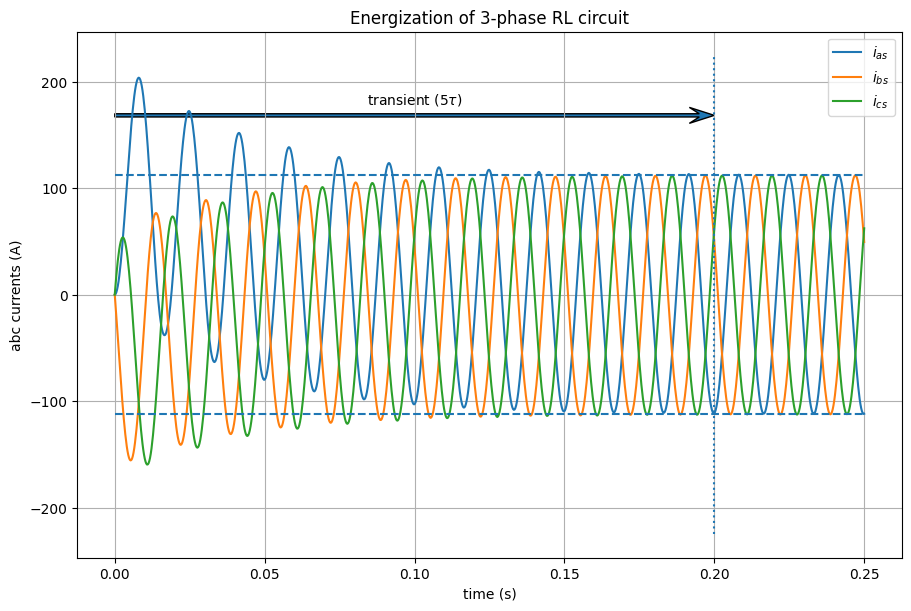

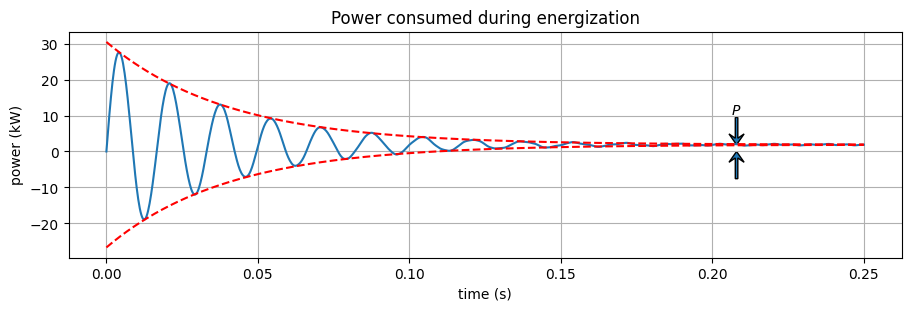

In [ ]:
# Plot currents and power
plt.figure(figsize=(9,6), constrained_layout=True)
plt.plot(t,i_as,t,i_bs,t,i_cs)
plt.xlabel('time (s)')
plt.ylabel('abc currents (A)')
plt.title('Energization of 3-phase RL circuit')
plt.legend([r'$i_{as}$',r'$i_{bs}$',r'$i_{cs}$'])
plt.hlines([I_pk,-I_pk],t[0],t[-1],linestyles='dashed') # horizontal lines for steady-state current
plt.vlines(5*tau,-2*I_pk,2*I_pk,linestyles='dotted') # vertical line for end of transient
plt.arrow(0.0,1.5*I_pk,5*tau,0,\
          length_includes_head=True,\
          width=3.0,head_width=15,head_length=0.5/f,\
          overhang=.4)
plt.text(2.5*tau,1.6*I_pk,r'transient ($5\tau$)',horizontalalignment='center')
plt.grid()

plt.figure(figsize=(9,3), constrained_layout=True)
plt.plot(t,pwr/1e3)
plt.xlabel('time (s)')
plt.ylabel('power (kW)')
plt.title('Power consumed during energization')
plt.arrow(5.2*tau,5*P_ss/1e3,0,-4*P_ss/1e3,\
          length_includes_head=True,\
          width=0.05/f,head_width=0.3/f,head_length=3,\
          overhang=.4)
plt.arrow(5.2*tau,-4*P_ss/1e3,0,4*P_ss/1e3,\
          length_includes_head=True,\
          width=0.05/f,head_width=0.3/f,head_length=3,\
          overhang=.4)
plt.text(5.2*tau,5.5*P_ss/1e3,r'$P$',horizontalalignment='center')
pwr_env = 3*E**2/np.abs(Z_s)*np.exp(-t/tau)
plt.plot(t,(pwr_env + P_ss)/1e3,'r--',t,(-pwr_env + P_ss)/1e3,'r--')
plt.grid();

<br>

---

<br>

## The general case: Unbalanced source and load

Now we will solve the more general problem of an unbalanced source that is connected to an unbalanced load, forming a 3-phase 4-wire system.
The asymmetry complicates things; however, it is not our objective to pursue an analytical expression of the solution. (In these situations, such solutions are typically obtained in the steady state by applying symmetrical component analysis: https://en.wikipedia.org/wiki/Symmetrical_components.) Instead, we will rely entirely on a computer simulation of the circuit dynamic equations.

### Modeling preliminaries

The circuit consists of a Y-connected load that is powered by a Y-connected voltage source, as before.
We will introduce a relatively mild imbalance; however, this is not necessary (and you can experiment by changing the parameters at will).


The load will have unequal resistances in each phase, $r_{as}$, $r_{bs}$, and $r_{cs}$. These will be stored in a diagonal matrix
$$
\mathbf{R}_s = \text{diag}(r_{as}, r_{bs}, r_{cs}) \,.
$$

Also, the inductance matrix will be modified as follows, but in such a way as to maintain symmetry  for physical reasons (reciprocity theorem):
$$
\mathbf{L}_s = \begin{bmatrix}
L_{as} & M_{ab} & M_{ca} \\
M_{ab} & L_{bs} & M_{bc} \\
M_{ca} & M_{bc} & L_{cs}
\end{bmatrix} \,.
$$
The inductance values must be such that $\mathbf{L}_s$ is *positive definite* (the reason for this will become clear at a later chapter; https://en.wikipedia.org/wiki/Definiteness_of_a_matrix).

There is also a neutral wire with resistance $r_n$ and inductance $L_n$, which we now expect to carry nonzero current $i_n$.

The $abc$ source voltages are unbalanced in both amplitude and phase, as follows:
\begin{align*}
e_{a}(t) &= \sqrt{2} E_a \cos(2\pi f t + \theta_{ea0}) \\
e_b(t) &= \sqrt{2} E_b \cos(2\pi f t + \theta_{eb0} - 2\pi/3)\\
e_c(t) &= \sqrt{2} E_c \cos(2\pi f t + \theta_{ec0} + 2\pi/3) \,.
\end{align*}

The differential equations of the circuit can be found by applying Kirchhoff's voltage law (KVL) around the loops formed by each phase and the neutral wire. This yields:
$$
\mathbf{e}_{abc} = \mathbf{R}_s \mathbf{i}_{abcs} + \mathbf{L}_s p \mathbf{i}_{abcs} + (r_n i_n + L_n pi_n) \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix} \,.
$$
Since
$$
i_n = i_{as} + i_{bs} + i_{cs} \,,
$$
we can rewrite the dynamic circuit equation as
$$
\mathbf{e}_{abc} = \mathbf{R} \mathbf{i}_{abcs} + \mathbf{L} p \mathbf{i}_{abcs}  \,,
$$
where
$$
\mathbf{R} = \mathbf{R}_s + r_n \begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}
$$
and
$$
\mathbf{L} = \mathbf{L}_s + L_n \begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix} \,.
$$
Hence, we will solve the ODE:
$$
\boxed{
p \mathbf{i}_{abcs} = - \mathbf{L}^{-1} \mathbf{R}\, \mathbf{i}_{abcs} + \mathbf{L}^{-1} \mathbf{e}_{abc} ~~\text{with}~~ \mathbf{i}_{abcs}(0) = \mathbf{0} \,.}
$$

Our problem is again of the form
$$
p\mathbf{y} = \mathbf{f}(\mathbf{y}, t) ~~\text{with}~~\mathbf{y}(0) = \mathbf{0} \,,
$$
and we shall use the solve_ivp function to perform the numerical integration.

### Numerical solution

Let us first re-define the circuit parameters below.
Before proceeding, we check the eigenvalues of the inductance matrix (they should be positive).

In [ ]:
# re-define circuit and source parameters -- feel free to change these!
r_as         = 1.0*r_s # a-phase resistance (ohm)
r_bs         = 0.8*r_s # b-phase resistance (ohm)
r_cs         = 1.2*r_s # c-phase resistance (ohm)
r_n          = 0.1*r_s # neutral wire resistance
L_as         = 1.0*L_s # a-phase self-inductance (henries, H)
L_bs         = 1.1*L_s # b-phase self-inductance (henries, H)
L_cs         = 1.5*L_s # c-phase self-inductance (henries, H)
M_ab         = 0.7*M # mutual inductance (H)
M_bc         = 2.0*M # mutual inductance (H)
M_ca         = 0.5*M # mutual inductance (H)
L_n          = 0.1*L_s # neutral wire inductance (H)
E_a          = 1.0*E # a-phase rms voltage (V)
E_b          = 0.9*E # b-phase rms voltage (V)
E_c          = 1.1*E # c-phase rms voltage (V)
f            = 0.99*60 # (off-nominal) frequency (Hz)
theta_ea0    = theta_e0 # a-phase voltage phase angle (rad)
theta_eb0    = theta_e0 + pi/60 # b-phase voltage phase angle (rad)
theta_ec0    = theta_e0 - pi/100 # c-phase voltage phase angle (rad)

# calculate useful constants
w_e        = 2*pi*f
R_s        = np.diag([r_as, r_bs, r_cs])
R          = R_s + r_n*np.ones((3,3))
L          = np.array([[L_as, M_ab, M_ca],\
                       [M_ab, L_bs, M_bc],\
                       [M_ca, M_bc, L_cs]]) + L_n*np.ones((3,3))
Linv       = np.linalg.inv(L) # inverse of L

# check positive definiteness of inductance matrix
w, _ = np.linalg.eig(L)
print('eigenvalues of L = {}'.format(w))
assert (w > 0).all(), "Inductance matrix is not positive definite!"

eigenvalues of L = [0.00221665 0.00347884 0.00600451]


Now, we can proceed with the numerical integration of the ODE.
We first re-define the excitation and derivative functions for the asymmetric case.
We also calculate the (three, distinct) time constants of the circuit reponse, which could provide  helpful information in understanding the solution.

In [ ]:
# voltage source function definition
E_apk = sqrt(2)*E_a
E_bpk = sqrt(2)*E_b
E_cpk = sqrt(2)*E_c
def e_abc2(t):
  e_a = E_apk*np.cos(w_e*t + theta_ea0)
  e_b = E_bpk*np.cos(w_e*t + theta_eb0 - two_pi_o_3)
  e_c = E_cpk*np.cos(w_e*t + theta_ec0 + two_pi_o_3)
  if np.isscalar(t): # ODE solver case
    x = np.array([e_a, e_b, e_c]).reshape(3,1)
  else: # plotting case
    x = np.array([e_a, e_b, e_c])
  return x

# derivative function definition
A = -np.matmul(Linv,R)
w, _ = np.linalg.eig(A)
print('Time-domain response parameters:')
print('eigenvalues of A = {}'.format(w))
print('time constants = {} ms'.format(-np.divide(1,w)*1e3))
def fun2(t, y):
  return np.matmul(A,y) + np.matmul(Linv,e_abc2(t))

# solve ODE
i_0        = np.zeros(3) # initial condition
N_cycles   = 15
t_span     = (0,N_cycles/f) # time span
N_pts      = 1000
t_eval     = np.linspace(t_span[0],t_span[-1],N_pts)
sol        = spint.solve_ivp(fun2, t_span, i_0, method='BDF', t_eval=t_eval,\
                             vectorized=True)
print('')
print(sol.message)

# post-processing
t = sol.t
i_as = sol.y[0,:]
i_bs = sol.y[1,:]
i_cs = sol.y[2,:]
i_n = i_as + i_bs + i_cs
pwr_src = np.sum(np.multiply(e_abc2(t),sol.y),axis=0) # power from source
pwr_n = np.square(i_n)*r_n # power dissipated in neutral wire

Time-domain response parameters:
eigenvalues of A = [-56.19391587 -29.00182333 -16.64431436]
time constants = [17.79552082 34.48059071 60.08057637] ms

The solver successfully reached the end of the integration interval.


Finally, we  visualize the current waveforms and the power provided by the source and dissipated in the neutral wire.

In general, the power will not be constant in the steady state due to the asymmetries present in the circuit, and will exhibit oscillations at double electrical frequency.

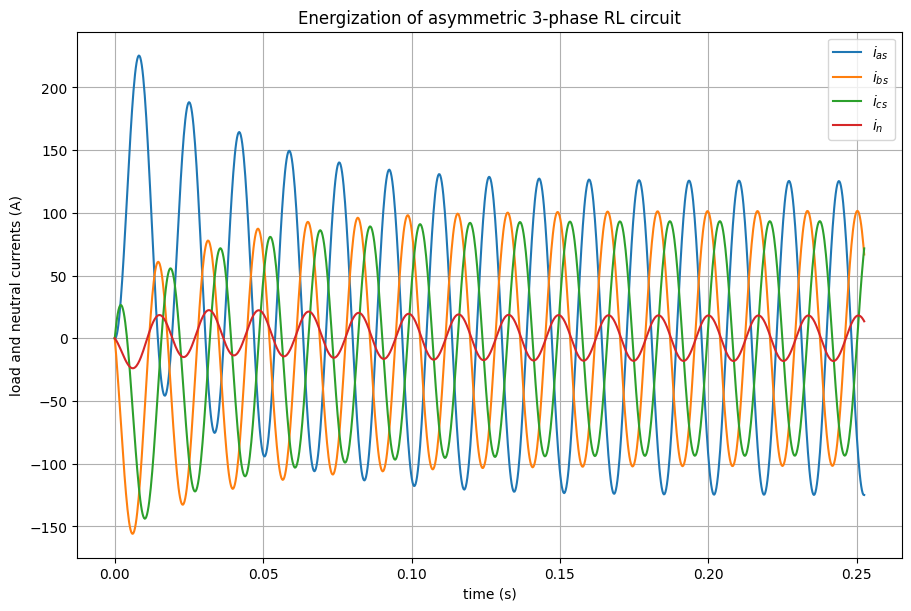

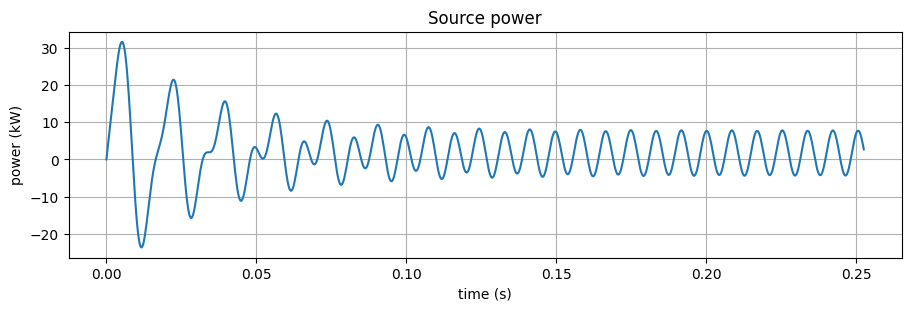

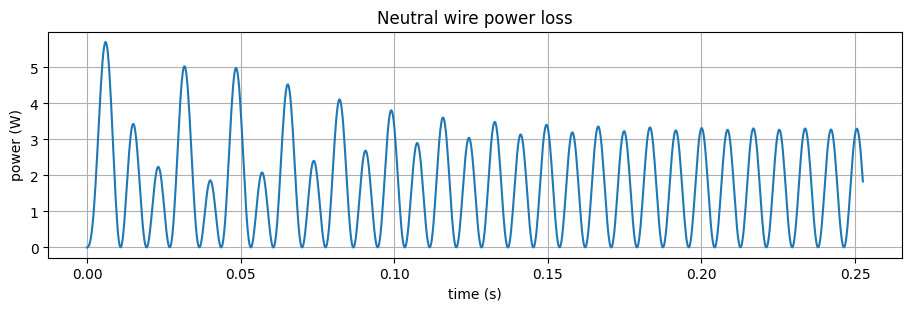

In [ ]:
# Plot currents and power
plt.figure(figsize=(9,6), constrained_layout=True)
plt.plot(t,i_as,t,i_bs,t,i_cs,t,i_n)
plt.xlabel('time (s)')
plt.ylabel('load and neutral currents (A)')
plt.title('Energization of asymmetric 3-phase RL circuit')
plt.legend([r'$i_{as}$',r'$i_{bs}$',r'$i_{cs}$',r'$i_n$'])
plt.grid()

plt.figure(figsize=(9,3), constrained_layout=True)
plt.plot(t,pwr_src/1e3)
plt.xlabel('time (s)')
plt.ylabel('power (kW)')
plt.title('Source power')
plt.grid()

plt.figure(figsize=(9,3), constrained_layout=True)
plt.plot(t,pwr_n)
plt.xlabel('time (s)')
plt.ylabel('power (W)')
plt.title('Neutral wire power loss')
plt.grid();

###Exercises:

1. Transform the system equations to $qd0$ variables with the transformation we have defined in the lectures, and repeat the study.

2. Repeat this study for the same unbalanced source and load system but without a neutral wire, i.e., forcing $i_n = 0$.

3. The time that we close the switch is totally arbitrary, in the sense that we cannot control the initial voltage phase angle (unless we use some sophisticated "point on wave" switching equipment).
Also, suppose that the asymmetry in the voltage source is not known beforehand, to represent  variability in the power grid, which acts as the source.
Suppose we model this *aleatoric uncertainty* using mutually independent random variables such that:
\begin{align}
\theta_{ea0} &\sim \mathcal{U}(-\pi, \pi) \\
\theta_{eb0} - \theta_{ea0} &\sim \mathcal{N}(0,\sigma_{\theta0}) \\
\theta_{ec0} - \theta_{ea0} &\sim \mathcal{N}(0,\sigma_{\theta0}) \\
E_a, E_b, E_c &\sim \mathcal{N}(E,\sigma_E)
\end{align}
Also, the load parameters may not be known precisely.
This  *epistemic uncertainty* can be modeled as Gaussian around the nominal, such that, e.g., for the $a$-phase:
\begin{align}
r_{as} &\sim \mathcal{N}(r_s, \sigma_r) \\
L_{as} &\sim \mathcal{N}(L_s,\sigma_L) \\
M_{ab}, M_{ac} &\sim \mathcal{N}(M, \sigma_M)
\end{align}
We should select the probability distribution parameters according to our beliefs regarding the uncertainty that we are trying to model.
 * Write Python code that samples source and load parameters from these distributions (https://docs.scipy.org/doc/numpy/reference/random/index.html), runs a time-domain simulation, and calculates the maximum value of the current in each phase during the transient. Then plot the statistics (e.g., a histogram) of the current peak.
 * Repeat for additional quantities of interest in the circuit response that can you think of.



---


## Conclusion

We studied the energization of symmetric and asymmetric three-phase *RL* circuits, and we learned how to conduct a computer simulation of the associated transient phenomenon.
We focused on a 4-wire system comprising a  Y-connected source and load.
However, a similar approach may be followed to model other configurations, e.g., using delta-connected components.
The same techniques can be applied for the analysis of power systems as well as rotating electric machinery (the focus of our course).

Our modeling was in physical $abc$ variables.
Alternatively, we could have conducted the simulation in transformed $qd0$ variables, as we have learned in the lectures.
This approach would have been advantageous, especially with regard to the equations  in the symmetric case.
However, for this small system, the computational advantage may not be significant.





